In [66]:
import pandas as pd
import json
from matplotlib import pyplot as plt

In [111]:
green = dict(x=[], y=[])
green_scale = []
red = dict(x=[], y=[])
red_scale = []
blue = dict(x=[], y=[])
blue_scale = []
red_scale = []
freqs = []
sample_number = 10
for j in range(4):
    with open(f'RO_locations{j}.json') as f:
        locations = json.load(f)
    data = pd.read_pickle(f'ALL_3_Stage_Exp_{j}.pkl')
    for i in locations.keys():
        freqs.append(data[f'RO{i}'].loc[sample_number])
        if data[f'RO{i}'].loc[sample_number] < 300:
            green['x'].append(locations[i][0])
            green['y'].append(locations[i][1])
            green_scale.append(1*(data[f'RO{i}'].loc[sample_number]))
        elif 300 < data[f'RO{i}'].loc[sample_number] < 500:
            blue['x'].append(locations[i][0])
            blue['y'].append(locations[i][1])
            blue_scale.append(1*(data[f'RO{i}'].loc[sample_number]))
        else:
            red['x'].append(locations[i][0])
            red['y'].append(locations[i][1])
            red_scale.append(1*(data[f'RO{i}'].loc[sample_number]))

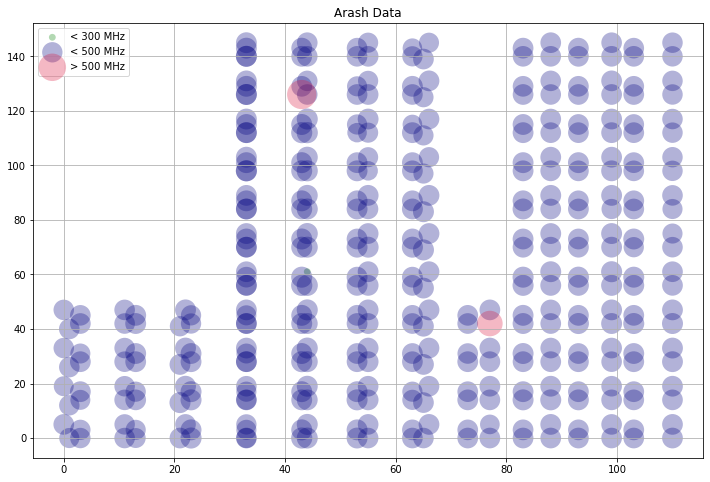

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(green['x'], green['y'], c='green', s=green_scale, label='< 300 MHz', alpha=0.3, edgecolors='none')
ax.scatter(blue['x'], blue['y'], c='navy', s=blue_scale, label='< 500 MHz', alpha=0.3, edgecolors='none')
ax.scatter(red['x'], red['y'], c='crimson', s=red_scale, label='> 500 MHz', alpha=0.3, edgecolors='none')

plt.title('Arash Data')
ax.legend()
ax.grid(True)

plt.show()

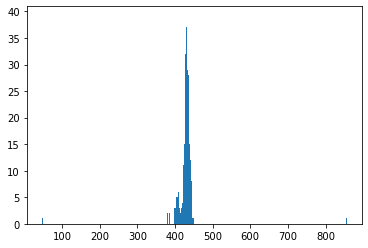

In [113]:
a = plt.hist(freqs, 500)

449.855